In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


import string
import math
import random as python_random
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from keras.preprocessing.text import Tokenizer
from keras.layers import Input, Dropout, Dense, BatchNormalization, Activation, concatenate, GRU, LSTM, Embedding, Flatten, BatchNormalization
from keras.models import Model
from keras import backend as K
import tensorflow as tf
from keras.layers import Conv1D,GlobalMaxPooling1D
from tensorflow.keras.preprocessing.sequence import pad_sequences

np.random.seed(123) 
python_random.seed(123)
tf.random.set_seed(1234)

import lightgbm as lgb

In [2]:
products_data = pd.read_csv('Dataset/Intermediate/all_products.csv')
products_data.head()

,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount
0,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Collections,"With ""I DO"" emblazoned on this Hanky Panky lac...",panties,40.0,40.0,0.0
1,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Panties,"With ""I DO"" emblazoned on this Hanky Panky lac...",panties,40.0,40.0,0.0
2,'After Midnight' Lace Open Gusset G-String,hanky panky,Bridal Lingerie,Stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0
3,'After Midnight' Lace Open Gusset G-String,hanky panky,Sexy Lingerie,Stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0
4,'After Midnight' Lace Open Gusset G-String,hanky panky,Women's Panties,Stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0


In [3]:
products_data['description'] = products_data['description'].str.lower()
products_data.head()

,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount
0,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Collections,"with ""i do"" emblazoned on this hanky panky lac...",panties,40.0,40.0,0.0
1,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Panties,"with ""i do"" emblazoned on this hanky panky lac...",panties,40.0,40.0,0.0
2,'After Midnight' Lace Open Gusset G-String,hanky panky,Bridal Lingerie,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0
3,'After Midnight' Lace Open Gusset G-String,hanky panky,Sexy Lingerie,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0
4,'After Midnight' Lace Open Gusset G-String,hanky panky,Women's Panties,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0


In [4]:
# Stopwords removal
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", 
             "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during",
             "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", 
             "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into",
             "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or",
             "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", 
             "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's",
             "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up",
             "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's",
             "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've",
             "your", "yours", "yourself", "yourselves"]

In [5]:
def remove_stopwords(data):
  data['clean_description'] = data['description'].apply(lambda x : ' '.join([word for word in x.split() if word not in (stopwords)]))
  return data

data_cleaned = remove_stopwords(products_data)
data_cleaned['clean_description'] = data_cleaned['clean_description'].str.replace('[{}]'.format(string.punctuation), ' ')
data_cleaned.head()

,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount,clean_description
0,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Collections,"with ""i do"" emblazoned on this hanky panky lac...",panties,40.0,40.0,0.0,i do emblazoned hanky panky lace hipster swa...
1,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Panties,"with ""i do"" emblazoned on this hanky panky lac...",panties,40.0,40.0,0.0,i do emblazoned hanky panky lace hipster swa...
2,'After Midnight' Lace Open Gusset G-String,hanky panky,Bridal Lingerie,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0,stretch signature lace fashions alluring doubl...
3,'After Midnight' Lace Open Gusset G-String,hanky panky,Sexy Lingerie,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0,stretch signature lace fashions alluring doubl...
4,'After Midnight' Lace Open Gusset G-String,hanky panky,Women's Panties,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0,stretch signature lace fashions alluring doubl...


In [6]:
# Tokenizing
raw_text = np.hstack([data_cleaned.clean_description.str.lower()])
tok_raw = Tokenizer()
tok_raw.fit_on_texts(raw_text)
data_cleaned["seq_description"] = tok_raw.texts_to_sequences(data_cleaned.clean_description.str.lower())
max_seq_description = np.max(data_cleaned.seq_description.apply(lambda x: len(x)))
MAX_TEXT = np.max(data_cleaned.seq_description.apply(lambda x : max(x))) + 3
data_cleaned.head()

,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount,clean_description,seq_description
0,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Collections,"with ""i do"" emblazoned on this hanky panky lac...",panties,40.0,40.0,0.0,i do emblazoned hanky panky lace hipster swa...,"[578, 579, 1489, 73, 75, 2, 197, 952, 442, 254..."
1,"""I DO"" Signature Lace Cheeky Hipster with Gift...",hanky panky,Panties,"with ""i do"" emblazoned on this hanky panky lac...",panties,40.0,40.0,0.0,i do emblazoned hanky panky lace hipster swa...,"[578, 579, 1489, 73, 75, 2, 197, 952, 442, 254..."
2,'After Midnight' Lace Open Gusset G-String,hanky panky,Bridal Lingerie,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0,stretch signature lace fashions alluring doubl...,"[32, 108, 2, 983, 580, 510, 117, 830, 499, 105..."
3,'After Midnight' Lace Open Gusset G-String,hanky panky,Sexy Lingerie,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0,stretch signature lace fashions alluring doubl...,"[32, 108, 2, 983, 580, 510, 117, 830, 499, 105..."
4,'After Midnight' Lace Open Gusset G-String,hanky panky,Women's Panties,stretch signature lace fashions an alluring do...,other,27.0,27.0,0.0,stretch signature lace fashions alluring doubl...,"[32, 108, 2, 983, 580, 510, 117, 830, 499, 105..."


In [7]:
words_to_index = tok_raw.word_index

def read_glove_vector(glove_vec):
  with open(glove_vec, 'r', encoding='UTF-8') as f:
    words = set()
    word_to_vec_map = {}
    for line in f:
      w_line = line.split()
      curr_word = w_line[0]
      word_to_vec_map[curr_word] = np.array(w_line[1:], dtype=np.float64)
  return word_to_vec_map

word_to_vec_map = read_glove_vector('Dataset/glove.6B/glove.6B.50d.txt')
maxLen = 150
vocab_len = len(words_to_index) + 1
embed_vector_len = word_to_vec_map['moon'].shape[0]
emb_matrix = np.zeros((vocab_len, embed_vector_len))

for word, index in words_to_index.items():
  embedding_vector = word_to_vec_map.get(word)
  if embedding_vector is not None:
    emb_matrix[index, :] = embedding_vector

array([[<AxesSubplot:title={'center':'target'}>]], dtype=object)

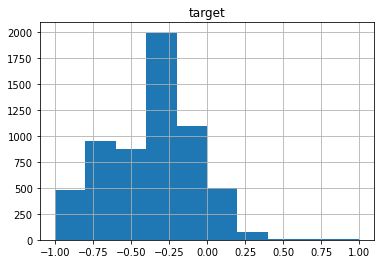

In [8]:
# Min Max Scaler for target
data_cleaned["target"] = np.log(data_cleaned.mrp+1)
target_scaler = MinMaxScaler(feature_range=(-1, 1))
data_cleaned["target"] = target_scaler.fit_transform(data_cleaned.target.values.reshape(-1,1))
pd.DataFrame(data_cleaned.target).hist()

In [9]:
# Train Test Split
dtrain, dtest = train_test_split(data_cleaned, random_state=123, train_size=0.80)
print(dtrain.shape)
print(dtest.shape)
dtrain.head()

(4785, 11)
(1197, 11)


,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount,clean_description,seq_description,target
4345,Rolled Fiery Floral Low Rise Thong,hanky panky,Thongs,red hot!,panties,25.00,25.000000,0.00,red hot,"[535, 433]",-0.413854
2544,Contrast Lace Triangle Bra,us topshop,Lingerie,non-padded triangle bra with non-wired cups fo...,bras,38.00,38.000000,0.00,non padded triangle bra non wired cups barely ...,"[450, 174, 157, 11, 450, 1042, 55, 802, 519, 3...",-0.232735
428,Aerie Boho Plunge Bralette,aerie,Plunge,"peace, love & lace. bralettes. we did them fir...",bralettes,26.95,17.066667,36.67,peace love lace bralettes first best la...,"[164, 28, 2, 137, 77, 97, 45, 79, 77, 70, 79, ...",-0.381549
1818,Amazing Assets Push-Up Bra 858220,b.tempt'd,Women - Lingerie & Shapewear - Designer Lingerie,highlight your figure in the most flattering w...,bras,68.00,38.592857,43.25,highlight figure flattering way amazing asset...,"[2053, 317, 219, 152, 900, 1269, 193, 210, 11,...",0.022124
2606,Cross-Dyed Lace Brazilian Bikini 592104,hanky panky,Women - Lingerie & Shapewear - Designer Lingerie,discover the soft feel of sheer lace in an ele...,other,32.00,32.000000,0.00,discover soft feel sheer lace elegant rose des...,"[791, 14, 129, 87, 2, 441, 358, 143, 308, 268,...",-0.307357


In [10]:
# Sequence Padding
def get_keras_data(dataset):
    X = {
        'item_desc': pad_sequences(dataset.seq_description, maxlen=75)
    }
    return X

X_train = get_keras_data(dtrain)
X_test = get_keras_data(dtest)
X_train

{'item_desc': array([[   0,    0,    0, ...,    0,  535,  433],
        [   0,    0,    0, ...,    9,   16,    4],
        [   0,    0,    0, ...,    1,    1,    7],
        ...,
        [   0,    0,    0, ...,    1,    1,    7],
        [   0,    0,    0, ...,   53,   63,   50],
        [   0,    0,    0, ...,   54, 1541,  210]])}

In [11]:
BATCH_SIZE = 2500
epochs = 50

## GRU Based Model

In [12]:
# Model Training
def rmsle_cust(y_true, y_pred):
    first_log = K.log(K.clip(y_pred, K.epsilon(), None) + 1.)
    second_log = K.log(K.clip(y_true, K.epsilon(), None) + 1.)
    return K.sqrt(K.mean(K.square(first_log - second_log), axis=-1))

def rmsle(y, y_pred):
    assert len(y) == len(y_pred)
    to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(to_sum) * (1.0/len(y))) ** 0.5

def get_gru_model(optimizer):
    # Params
    dr_r = 0.1
    
    # Inputs
    item_desc = Input(shape=[X_train["item_desc"].shape[1]], name="item_desc")
    
    # Embeddings Layers
    emb_item_desc = Embedding(MAX_TEXT, 50)(item_desc)
#     emb_item_desc = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=True)(item_desc)
    
    # RNN Layer
    rnn_layer1 = GRU(16) (emb_item_desc)
    
    # Main Layer
    main_l = concatenate([
        rnn_layer1
    ])
    main_l = Dropout(dr_r) (Dense(128) (main_l))
    main_l = Dropout(dr_r) (Dense(64) (main_l))
    
    # Output Layer
    output = Dense(1, activation="linear") (main_l)
    
    # Init Model
    model = Model([item_desc], output)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae", rmsle_cust])
    
    return model

# Calculation of Loss History
class LossHistory(tf.keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        self.losses.append(logs.get('loss'))

### gru with adam optimizer

In [13]:
adam_gru_model = get_gru_model('adam')

adam_gru_history = LossHistory()
adam_gru_model.summary()
adam_gru_model = get_gru_model('adam')
adam_gru_model.fit(X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(X_test, dtest.target)
          , verbose=1, callbacks=[adam_gru_history])

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 item_desc (InputLayer)      [(None, 75)]              0         
                                                                 
 embedding (Embedding)       (None, 75, 50)            166250    
                                                                 
 gru (GRU)                   (None, 16)                3264      
                                                                 
 concatenate (Concatenate)   (None, 16)                0         
                                                                 
 dense (Dense)               (None, 128)               2176      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256  

2/2 [==============================] - 1s 446ms/step - loss: 0.0136 - mae: 0.0833 - rmsle_cust: 0.0063 - val_loss: 0.0188 - val_mae: 0.0958 - val_rmsle_cust: 0.0070
Epoch 39/50
2/2 [==============================] - 1s 396ms/step - loss: 0.0129 - mae: 0.0807 - rmsle_cust: 0.0063 - val_loss: 0.0185 - val_mae: 0.0944 - val_rmsle_cust: 0.0071
Epoch 40/50
2/2 [==============================] - 1s 435ms/step - loss: 0.0126 - mae: 0.0783 - rmsle_cust: 0.0061 - val_loss: 0.0183 - val_mae: 0.0927 - val_rmsle_cust: 0.0071
Epoch 41/50
2/2 [==============================] - 1s 380ms/step - loss: 0.0124 - mae: 0.0779 - rmsle_cust: 0.0061 - val_loss: 0.0181 - val_mae: 0.0914 - val_rmsle_cust: 0.0071
Epoch 42/50
2/2 [==============================] - 1s 445ms/step - loss: 0.0119 - mae: 0.0755 - rmsle_cust: 0.0059 - val_loss: 0.0180 - val_mae: 0.0905 - val_rmsle_cust: 0.0072
Epoch 43/50
2/2 [==============================] - 1s 449ms/step - loss: 0.0116 - mae: 0.0749 - rmsle_cust: 0.0058 - val_loss: 

38/38 [==============================] - 2s 11ms/step
 RMSLE error for GRU Based Model on Test Data: 0.29912373966155203
 RMSE error for GRU Based Model on Test Data: 14.327841066323987


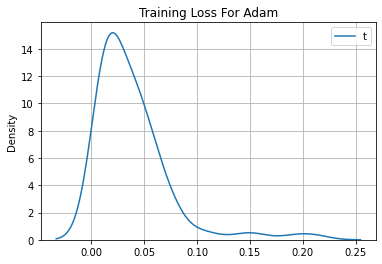

In [14]:
loss_range=np.log(adam_gru_history.losses)
sns.distplot(adam_gru_history.losses, hist=False)
plt.title('Training Loss For Adam')
plt.grid()
plt.legend('top')
val_preds = adam_gru_model.predict(X_test)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

# mean_absolute_error, mean_squared_log_error.
y_true = np.array(dtest.mrp.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
v_rmse = mean_squared_error(y_true, y_pred , squared=False)
print(" RMSLE error for GRU Based Model on Test Data: "+str(v_rmsle))
print(" RMSE error for GRU Based Model on Test Data: "+str(v_rmse))
plt.show()

### gru with stochastic gradient descent optimizer

In [15]:
sgd_gru_model = get_gru_model('sgd')

sgd_gru_history = LossHistory()
sgd_gru_model.summary()
sgd_gru_model = get_gru_model('sgd')
sgd_gru_model.fit(X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(X_test, dtest.target)
          , verbose=1, callbacks=[sgd_gru_history])

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 item_desc (InputLayer)      [(None, 75)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 75, 50)            166250    
                                                                 
 gru_2 (GRU)                 (None, 16)                3264      
                                                                 
 concatenate_2 (Concatenate)  (None, 16)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               2176      
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 64)                8256

2/2 [==============================] - 1s 417ms/step - loss: 0.0764 - mae: 0.2236 - rmsle_cust: 0.0097 - val_loss: 0.0724 - val_mae: 0.2161 - val_rmsle_cust: 0.0094
Epoch 39/50
2/2 [==============================] - 1s 478ms/step - loss: 0.0762 - mae: 0.2231 - rmsle_cust: 0.0097 - val_loss: 0.0723 - val_mae: 0.2161 - val_rmsle_cust: 0.0094
Epoch 40/50
2/2 [==============================] - 1s 428ms/step - loss: 0.0763 - mae: 0.2236 - rmsle_cust: 0.0097 - val_loss: 0.0723 - val_mae: 0.2161 - val_rmsle_cust: 0.0094
Epoch 41/50
2/2 [==============================] - 1s 466ms/step - loss: 0.0761 - mae: 0.2230 - rmsle_cust: 0.0097 - val_loss: 0.0723 - val_mae: 0.2160 - val_rmsle_cust: 0.0094
Epoch 42/50
2/2 [==============================] - 1s 414ms/step - loss: 0.0760 - mae: 0.2232 - rmsle_cust: 0.0097 - val_loss: 0.0722 - val_mae: 0.2160 - val_rmsle_cust: 0.0094
Epoch 43/50
2/2 [==============================] - 1s 459ms/step - loss: 0.0767 - mae: 0.2241 - rmsle_cust: 0.0097 - val_loss: 

38/38 [==============================] - 1s 10ms/step
 RMSLE error for GRU Based Model on Test Data: 0.6040125034477878
 RMSE error for GRU Based Model on Test Data: 28.37200168127996


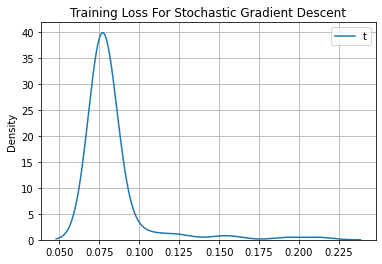

In [16]:
loss_range=np.log(sgd_gru_history.losses)
sns.distplot(sgd_gru_history.losses, hist=False)
plt.title('Training Loss For Stochastic Gradient Descent')
plt.grid()
plt.legend('top')
val_preds = sgd_gru_model.predict(X_test)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

# mean_absolute_error, mean_squared_log_error.
y_true = np.array(dtest.mrp.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
v_rmse = mean_squared_error(y_true, y_pred , squared=False)
print(" RMSLE error for GRU Based Model on Test Data: "+str(v_rmsle))
print(" RMSE error for GRU Based Model on Test Data: "+str(v_rmse))
plt.show()

### gru with adagrad optimizer

In [17]:
adagrad_gru_model = get_gru_model('adagrad')

adagrad_gru_history = LossHistory()
adagrad_gru_model.summary()
adagrad_gru_model = get_gru_model('adagrad')
adagrad_gru_model.fit(X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(X_test, dtest.target)
          , verbose=1, callbacks=[adagrad_gru_history])

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 item_desc (InputLayer)      [(None, 75)]              0         
                                                                 
 embedding_4 (Embedding)     (None, 75, 50)            166250    
                                                                 
 gru_4 (GRU)                 (None, 16)                3264      
                                                                 
 concatenate_4 (Concatenate)  (None, 16)               0         
                                                                 
 dense_12 (Dense)            (None, 128)               2176      
                                                                 
 dropout_8 (Dropout)         (None, 128)               0         
                                                                 
 dense_13 (Dense)            (None, 64)                8256

2/2 [==============================] - 0s 271ms/step - loss: 0.0806 - mae: 0.2244 - rmsle_cust: 0.0097 - val_loss: 0.0754 - val_mae: 0.2145 - val_rmsle_cust: 0.0094
Epoch 39/50
2/2 [==============================] - 1s 298ms/step - loss: 0.0800 - mae: 0.2235 - rmsle_cust: 0.0097 - val_loss: 0.0749 - val_mae: 0.2140 - val_rmsle_cust: 0.0094
Epoch 40/50
2/2 [==============================] - 1s 353ms/step - loss: 0.0794 - mae: 0.2227 - rmsle_cust: 0.0097 - val_loss: 0.0745 - val_mae: 0.2135 - val_rmsle_cust: 0.0094
Epoch 41/50
2/2 [==============================] - 1s 358ms/step - loss: 0.0790 - mae: 0.2226 - rmsle_cust: 0.0097 - val_loss: 0.0741 - val_mae: 0.2130 - val_rmsle_cust: 0.0094
Epoch 42/50
2/2 [==============================] - 1s 408ms/step - loss: 0.0787 - mae: 0.2223 - rmsle_cust: 0.0097 - val_loss: 0.0737 - val_mae: 0.2125 - val_rmsle_cust: 0.0094
Epoch 43/50
2/2 [==============================] - 1s 360ms/step - loss: 0.0784 - mae: 0.2221 - rmsle_cust: 0.0097 - val_loss: 

38/38 [==============================] - 1s 11ms/step
 RMSLE error for GRU Based Model on Test Data: 0.6133000112773218
 RMSE error for GRU Based Model on Test Data: 27.645584090128445


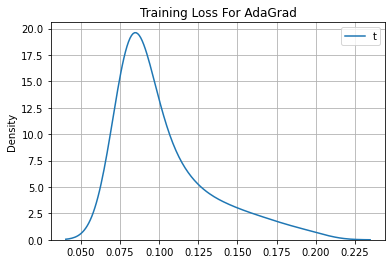

In [18]:
loss_range=np.log(adagrad_gru_history.losses)
sns.distplot(adagrad_gru_history.losses, hist=False)
plt.title('Training Loss For AdaGrad')
plt.grid()
plt.legend('top')
val_preds = adagrad_gru_model.predict(X_test)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

# mean_absolute_error, mean_squared_log_error.
y_true = np.array(dtest.mrp.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
v_rmse = mean_squared_error(y_true, y_pred , squared=False)
print(" RMSLE error for GRU Based Model on Test Data: "+str(v_rmsle))
print(" RMSE error for GRU Based Model on Test Data: "+str(v_rmse))
plt.show()

### Comparison between optimizers

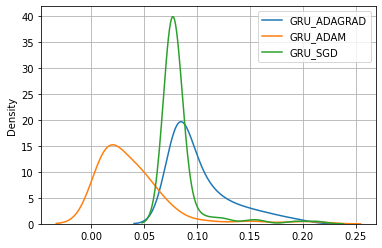

In [19]:
f, ax = plt.subplots(1, 1)
sns.distplot(adagrad_gru_history.losses, hist=False, ax=ax)
sns.distplot(adam_gru_history.losses, hist=False, ax=ax)
sns.distplot(sgd_gru_history.losses, hist=False, ax=ax)
plt.legend(['GRU_ADAGRAD','GRU_ADAM','GRU_SGD'])
plt.grid()

## LSTM Based Model

In [21]:
def get_lstm_model(optimizer):
    # Params
    dr_r = 0.1
    
    # Inputs
    item_desc = Input(shape=[X_train["item_desc"].shape[1]], name="item_desc")
    
    # Embeddings Layers
    emb_item_desc = Embedding(MAX_TEXT, 50)(item_desc)
#     emb_item_desc = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=True)(item_desc)
    
    # RNN Layer
    rnn_layer1 = LSTM(16) (emb_item_desc)
    
    # Main Layer
    main_l = concatenate([
        rnn_layer1
    ])
    main_l = Dropout(dr_r) (Dense(128) (main_l))
    main_l = Dropout(dr_r) (Dense(64) (main_l))
    
    # Output Layer
    output = Dense(1, activation="linear") (main_l)
    
    # Init Model
    model = Model([item_desc], output)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae", rmsle_cust])
    
    return model

### lstm with adam optimizer

In [22]:
adam_lstm_model = get_lstm_model('adam')

adam_lstm_history = LossHistory()
adam_lstm_model.summary()
adam_lstm_model = get_lstm_model('adam')
adam_lstm_model.fit(X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(X_test, dtest.target)
          , verbose=1, callbacks=[adam_lstm_history])

Model: "model_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 item_desc (InputLayer)      [(None, 75)]              0         
                                                                 
 embedding_6 (Embedding)     (None, 75, 50)            166250    
                                                                 
 lstm (LSTM)                 (None, 16)                4288      
                                                                 
 concatenate_6 (Concatenate)  (None, 16)               0         
                                                                 
 dense_18 (Dense)            (None, 128)               2176      
                                                                 
 dropout_12 (Dropout)        (None, 128)               0         
                                                                 
 dense_19 (Dense)            (None, 64)                8256

Epoch 39/50
2/2 [==============================] - 1s 801ms/step - loss: 0.0093 - mae: 0.0655 - rmsle_cust: 0.0062 - val_loss: 0.0145 - val_mae: 0.0790 - val_rmsle_cust: 0.0073
Epoch 40/50
2/2 [==============================] - 1s 707ms/step - loss: 0.0092 - mae: 0.0645 - rmsle_cust: 0.0061 - val_loss: 0.0144 - val_mae: 0.0784 - val_rmsle_cust: 0.0073
Epoch 41/50
2/2 [==============================] - 1s 758ms/step - loss: 0.0091 - mae: 0.0640 - rmsle_cust: 0.0061 - val_loss: 0.0144 - val_mae: 0.0779 - val_rmsle_cust: 0.0072
Epoch 42/50
2/2 [==============================] - 1s 815ms/step - loss: 0.0089 - mae: 0.0631 - rmsle_cust: 0.0060 - val_loss: 0.0144 - val_mae: 0.0779 - val_rmsle_cust: 0.0073
Epoch 43/50
2/2 [==============================] - 1s 642ms/step - loss: 0.0089 - mae: 0.0631 - rmsle_cust: 0.0060 - val_loss: 0.0144 - val_mae: 0.0781 - val_rmsle_cust: 0.0074
Epoch 44/50
2/2 [==============================] - 1s 736ms/step - loss: 0.0087 - mae: 0.0625 - rmsle_cust: 0.0060 

38/38 [==============================] - 2s 13ms/step
 RMSLE error for LSTM Based Model on Test Data: 0.27862497585178186
 RMSE error for LSTM Based Model on Test Data: 13.469920094123808


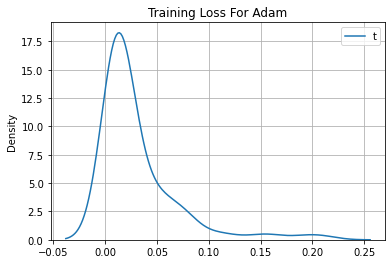

In [23]:
loss_range=np.log(adam_lstm_history.losses)
sns.distplot(adam_lstm_history.losses, hist=False)
plt.title('Training Loss For Adam')
plt.grid()
plt.legend('top')
val_preds = adam_lstm_model.predict(X_test)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

# mean_absolute_error, mean_squared_log_error.
y_true = np.array(dtest.mrp.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
v_rmse = mean_squared_error(y_true, y_pred , squared=False)
print(" RMSLE error for LSTM Based Model on Test Data: "+str(v_rmsle))
print(" RMSE error for LSTM Based Model on Test Data: "+str(v_rmse))
plt.show()

### lstm with stochastic gradient descent optimizer

In [24]:
sgd_lstm_model = get_lstm_model('sgd')

sgd_lstm_history = LossHistory()
sgd_lstm_model.summary()
sgd_lstm_model = get_lstm_model('sgd')
sgd_lstm_model.fit(X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(X_test, dtest.target)
          , verbose=1, callbacks=[sgd_lstm_history])

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 item_desc (InputLayer)      [(None, 75)]              0         
                                                                 
 embedding_8 (Embedding)     (None, 75, 50)            166250    
                                                                 
 lstm_2 (LSTM)               (None, 16)                4288      
                                                                 
 concatenate_8 (Concatenate)  (None, 16)               0         
                                                                 
 dense_24 (Dense)            (None, 128)               2176      
                                                                 
 dropout_16 (Dropout)        (None, 128)               0         
                                                                 
 dense_25 (Dense)            (None, 64)                8256

2/2 [==============================] - 1s 532ms/step - loss: 0.0731 - mae: 0.2206 - rmsle_cust: 0.0097 - val_loss: 0.0694 - val_mae: 0.2128 - val_rmsle_cust: 0.0094
Epoch 39/50
2/2 [==============================] - 1s 527ms/step - loss: 0.0733 - mae: 0.2209 - rmsle_cust: 0.0097 - val_loss: 0.0693 - val_mae: 0.2127 - val_rmsle_cust: 0.0094
Epoch 40/50
2/2 [==============================] - 1s 520ms/step - loss: 0.0731 - mae: 0.2208 - rmsle_cust: 0.0097 - val_loss: 0.0693 - val_mae: 0.2127 - val_rmsle_cust: 0.0094
Epoch 41/50
2/2 [==============================] - 1s 531ms/step - loss: 0.0731 - mae: 0.2210 - rmsle_cust: 0.0097 - val_loss: 0.0692 - val_mae: 0.2127 - val_rmsle_cust: 0.0094
Epoch 42/50
2/2 [==============================] - 1s 521ms/step - loss: 0.0732 - mae: 0.2211 - rmsle_cust: 0.0097 - val_loss: 0.0692 - val_mae: 0.2127 - val_rmsle_cust: 0.0094
Epoch 43/50
2/2 [==============================] - 1s 469ms/step - loss: 0.0729 - mae: 0.2208 - rmsle_cust: 0.0097 - val_loss: 

38/38 [==============================] - 1s 14ms/step
 RMSLE error for LSTM Based Model on Test Data: 0.5913371452000189
 RMSE error for LSTM Based Model on Test Data: 28.06069509459247


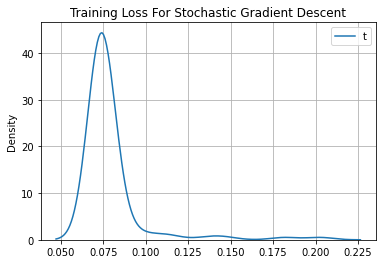

In [25]:
loss_range=np.log(sgd_lstm_history.losses)
sns.distplot(sgd_lstm_history.losses, hist=False)
plt.title('Training Loss For Stochastic Gradient Descent')
plt.grid()
plt.legend('top')
val_preds = sgd_lstm_model.predict(X_test)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

# mean_absolute_error, mean_squared_log_error.
y_true = np.array(dtest.mrp.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
v_rmse = mean_squared_error(y_true, y_pred , squared=False)
print(" RMSLE error for LSTM Based Model on Test Data: "+str(v_rmsle))
print(" RMSE error for LSTM Based Model on Test Data: "+str(v_rmse))
plt.show()

### lstm with adagrad optimizer

In [26]:
adagrad_lstm_model = get_lstm_model('adagrad')

adagrad_lstm_history = LossHistory()
adagrad_lstm_model.summary()
adagrad_lstm_model = get_lstm_model('adagrad')
adagrad_lstm_model.fit(X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE
          , validation_data=(X_test, dtest.target)
          , verbose=1, callbacks=[adagrad_lstm_history])

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 item_desc (InputLayer)      [(None, 75)]              0         
                                                                 
 embedding_10 (Embedding)    (None, 75, 50)            166250    
                                                                 
 lstm_4 (LSTM)               (None, 16)                4288      
                                                                 
 concatenate_10 (Concatenate  (None, 16)               0         
 )                                                               
                                                                 
 dense_30 (Dense)            (None, 128)               2176      
                                                                 
 dropout_20 (Dropout)        (None, 128)               0         
                                                          

Epoch 38/50
2/2 [==============================] - 1s 490ms/step - loss: 0.0852 - mae: 0.2290 - rmsle_cust: 0.0097 - val_loss: 0.0803 - val_mae: 0.2193 - val_rmsle_cust: 0.0094
Epoch 39/50
2/2 [==============================] - 1s 504ms/step - loss: 0.0847 - mae: 0.2282 - rmsle_cust: 0.0097 - val_loss: 0.0798 - val_mae: 0.2189 - val_rmsle_cust: 0.0094
Epoch 40/50
2/2 [==============================] - 1s 461ms/step - loss: 0.0837 - mae: 0.2272 - rmsle_cust: 0.0097 - val_loss: 0.0794 - val_mae: 0.2185 - val_rmsle_cust: 0.0094
Epoch 41/50
2/2 [==============================] - 1s 488ms/step - loss: 0.0835 - mae: 0.2272 - rmsle_cust: 0.0097 - val_loss: 0.0790 - val_mae: 0.2182 - val_rmsle_cust: 0.0094
Epoch 42/50
2/2 [==============================] - 1s 562ms/step - loss: 0.0833 - mae: 0.2273 - rmsle_cust: 0.0097 - val_loss: 0.0786 - val_mae: 0.2179 - val_rmsle_cust: 0.0094
Epoch 43/50
2/2 [==============================] - 1s 420ms/step - loss: 0.0829 - mae: 0.2267 - rmsle_cust: 0.0097 

38/38 [==============================] - 2s 15ms/step
 RMSLE error for LSTM Based Model on Test Data: 0.6328570804501149
 RMSE error for LSTM Based Model on Test Data: 28.146042343972407


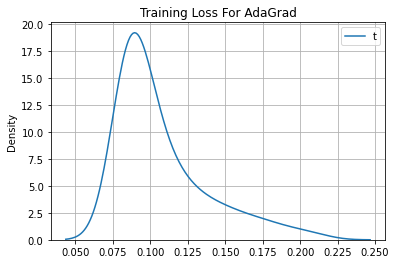

In [27]:
loss_range=np.log(adagrad_lstm_history.losses)
sns.distplot(adagrad_lstm_history.losses, hist=False)
plt.title('Training Loss For AdaGrad')
plt.grid()
plt.legend('top')
val_preds = adagrad_lstm_model.predict(X_test)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

# mean_absolute_error, mean_squared_log_error.
y_true = np.array(dtest.mrp.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
v_rmse = mean_squared_error(y_true, y_pred , squared=False)
print(" RMSLE error for LSTM Based Model on Test Data: "+str(v_rmsle))
print(" RMSE error for LSTM Based Model on Test Data: "+str(v_rmse))
plt.show()

### Comparison between optimizers

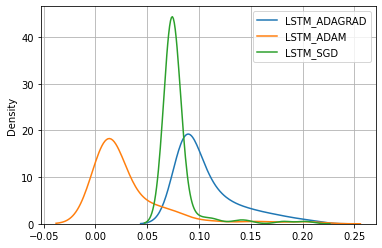

In [28]:
f, ax = plt.subplots(1, 1)
sns.distplot(adagrad_lstm_history.losses, hist=False, ax=ax)
sns.distplot(adam_lstm_history.losses, hist=False, ax=ax)
sns.distplot(sgd_lstm_history.losses, hist=False, ax=ax)
plt.legend(['LSTM_ADAGRAD','LSTM_ADAM','LSTM_SGD'])
plt.grid()

## CNN Based MODEL

In [29]:
def cnn_model(optimizer, lr=0.001, decay=0.0):

    # Inputs
    item_desc = Input(shape=[X_train["item_desc"].shape[1]], name="item_desc")

    # Embeddings layers
    emb_item_desc = Embedding(MAX_TEXT, 50)(item_desc)
#     emb_item_desc = Embedding(input_dim=vocab_len, output_dim=embed_vector_len, input_length=maxLen, weights = [emb_matrix], trainable=True)(item_desc)

    convs1 = []
    
    for filter_length in [1,2,3]:
        cnn_layer1 = Conv1D(filters=50, kernel_size=filter_length, padding='same', activation='relu', strides=1) (emb_item_desc)
        
        maxpool1 = GlobalMaxPooling1D() (cnn_layer1)
        
        convs1.append(maxpool1)

    convs1 = concatenate(convs1)
    
    # main layers
    main_l = concatenate([
        convs1
    ])

    main_l = Dense(256)(main_l)
    main_l = Activation('elu')(main_l)

    main_l = Dense(128)(main_l)
    main_l = Activation('elu')(main_l)

    main_l = Dense(64)(main_l)
    main_l = Activation('elu')(main_l)

    # the output layer.
    output = Dense(1, activation="linear") (main_l)

    model = Model([item_desc], output)

#     optimizer = Adam(lr=lr, decay=decay)
#     model.compile(loss="mse", optimizer=optimizer)
    model.compile(loss="mse", optimizer=optimizer, metrics=["mae", rmsle_cust])

    return model

In [30]:
# Calculate learning rate decay.
exp_decay = lambda init, fin, steps: (init/fin)**(1/(steps-1)) - 1
steps = int(dtrain.shape[0] / BATCH_SIZE) * epochs
lr_init, lr_fin = 0.007, 0.0005
lr_decay = exp_decay(lr_init, lr_fin, steps)

In [31]:
adam_cnn_model = cnn_model('adam', lr=lr_init, decay=lr_decay)

adam_cnn_history = LossHistory()
adam_cnn_model.summary()
adam_cnn_model = cnn_model('adam', lr=lr_init, decay=lr_decay)
adam_cnn_model.fit(
        X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE,
        validation_data=(X_test, dtest.target), verbose=2, callbacks=[adam_cnn_history]
)

Model: "model_12"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 item_desc (InputLayer)         [(None, 75)]         0           []                               
                                                                                                  
 embedding_12 (Embedding)       (None, 75, 50)       166250      ['item_desc[0][0]']              
                                                                                                  
 conv1d (Conv1D)                (None, 75, 50)       2550        ['embedding_12[0][0]']           
                                                                                                  
 conv1d_1 (Conv1D)              (None, 75, 50)       5050        ['embedding_12[0][0]']           
                                                                                           

Epoch 25/50
2/2 - 1s - loss: 0.0085 - mae: 0.0607 - rmsle_cust: 0.0074 - val_loss: 0.0134 - val_mae: 0.0746 - val_rmsle_cust: 0.0076 - 738ms/epoch - 369ms/step
Epoch 26/50
2/2 - 1s - loss: 0.0080 - mae: 0.0570 - rmsle_cust: 0.0074 - val_loss: 0.0134 - val_mae: 0.0768 - val_rmsle_cust: 0.0076 - 732ms/epoch - 366ms/step
Epoch 27/50
2/2 - 1s - loss: 0.0077 - mae: 0.0561 - rmsle_cust: 0.0070 - val_loss: 0.0129 - val_mae: 0.0715 - val_rmsle_cust: 0.0071 - 716ms/epoch - 358ms/step
Epoch 28/50
2/2 - 1s - loss: 0.0072 - mae: 0.0515 - rmsle_cust: 0.0062 - val_loss: 0.0129 - val_mae: 0.0736 - val_rmsle_cust: 0.0069 - 759ms/epoch - 380ms/step
Epoch 29/50
2/2 - 1s - loss: 0.0071 - mae: 0.0518 - rmsle_cust: 0.0059 - val_loss: 0.0125 - val_mae: 0.0693 - val_rmsle_cust: 0.0068 - 744ms/epoch - 372ms/step
Epoch 30/50
2/2 - 1s - loss: 0.0067 - mae: 0.0482 - rmsle_cust: 0.0057 - val_loss: 0.0126 - val_mae: 0.0713 - val_rmsle_cust: 0.0067 - 740ms/epoch - 370ms/step
Epoch 31/50
2/2 - 1s - loss: 0.0066 - ma

38/38 [==============================] - 0s 4ms/step
 RMSLE error for CNN Based Model on Test Data: 0.2543572669035804
 RMSE error for CNN Based Model on Test Data: 12.250571511540352


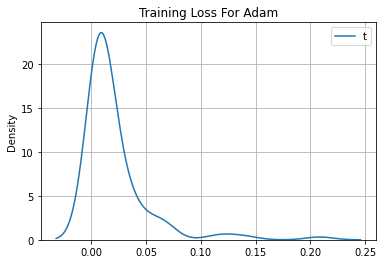

In [32]:
loss_range=np.log(adam_cnn_history.losses)
sns.distplot(adam_cnn_history.losses, hist=False)
plt.title('Training Loss For Adam')
plt.grid()
plt.legend('top')
val_preds = adam_cnn_model.predict(X_test)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

# mean_absolute_error, mean_squared_log_error.
y_true = np.array(dtest.mrp.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
v_rmse = mean_squared_error(y_true, y_pred , squared=False)
print(" RMSLE error for CNN Based Model on Test Data: "+str(v_rmsle))
print(" RMSE error for CNN Based Model on Test Data: "+str(v_rmse))
plt.show()

### cnn with stochastic gradient descent optimizer

In [35]:
sgd_cnn_model = cnn_model('sgd', lr=lr_init, decay=lr_decay)

sgd_cnn_history = LossHistory()
sgd_cnn_model.summary()
sgd_cnn_model = cnn_model('sgd', lr=lr_init, decay=lr_decay)
sgd_cnn_model.fit(
        X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE,
        validation_data=(X_test, dtest.target), verbose=2, callbacks=[sgd_cnn_history]
)

Model: "model_16"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 item_desc (InputLayer)         [(None, 75)]         0           []                               
                                                                                                  
 embedding_16 (Embedding)       (None, 75, 50)       166250      ['item_desc[0][0]']              
                                                                                                  
 conv1d_12 (Conv1D)             (None, 75, 50)       2550        ['embedding_16[0][0]']           
                                                                                                  
 conv1d_13 (Conv1D)             (None, 75, 50)       5050        ['embedding_16[0][0]']           
                                                                                           

Epoch 25/50
2/2 - 4s - loss: 0.0673 - mae: 0.2147 - rmsle_cust: 0.0097 - val_loss: 0.0643 - val_mae: 0.2077 - val_rmsle_cust: 0.0094 - 4s/epoch - 2s/step
Epoch 26/50
2/2 - 5s - loss: 0.0671 - mae: 0.2146 - rmsle_cust: 0.0097 - val_loss: 0.0642 - val_mae: 0.2074 - val_rmsle_cust: 0.0094 - 5s/epoch - 2s/step
Epoch 27/50
2/2 - 5s - loss: 0.0670 - mae: 0.2143 - rmsle_cust: 0.0097 - val_loss: 0.0641 - val_mae: 0.2072 - val_rmsle_cust: 0.0094 - 5s/epoch - 2s/step
Epoch 28/50
2/2 - 6s - loss: 0.0668 - mae: 0.2142 - rmsle_cust: 0.0097 - val_loss: 0.0639 - val_mae: 0.2070 - val_rmsle_cust: 0.0094 - 6s/epoch - 3s/step
Epoch 29/50
2/2 - 6s - loss: 0.0667 - mae: 0.2141 - rmsle_cust: 0.0097 - val_loss: 0.0638 - val_mae: 0.2067 - val_rmsle_cust: 0.0094 - 6s/epoch - 3s/step
Epoch 30/50
2/2 - 6s - loss: 0.0665 - mae: 0.2136 - rmsle_cust: 0.0097 - val_loss: 0.0636 - val_mae: 0.2065 - val_rmsle_cust: 0.0094 - 6s/epoch - 3s/step
Epoch 31/50
2/2 - 6s - loss: 0.0664 - mae: 0.2134 - rmsle_cust: 0.0097 - val

38/38 [==============================] - 1s 8ms/step
 RMSLE error for CNN Based Model on Test Data: 0.5579573687790743
 RMSE error for CNN Based Model on Test Data: 27.490663185845406


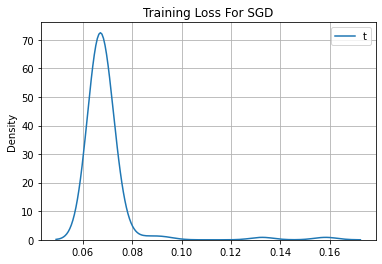

In [36]:
loss_range=np.log(sgd_cnn_history.losses)
sns.distplot(sgd_cnn_history.losses, hist=False)
plt.title('Training Loss For SGD')
plt.grid()
plt.legend('top')
val_preds = sgd_cnn_model.predict(X_test)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

# mean_absolute_error, mean_squared_log_error.
y_true = np.array(dtest.mrp.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
v_rmse = mean_squared_error(y_true, y_pred , squared=False)
print(" RMSLE error for CNN Based Model on Test Data: "+str(v_rmsle))
print(" RMSE error for CNN Based Model on Test Data: "+str(v_rmse))
plt.show()

### cnn with adagrad optimizer

In [37]:
adagrad_cnn_model = cnn_model('adagrad', lr=lr_init, decay=lr_decay)

adagrad_cnn_history = LossHistory()
adagrad_cnn_model.summary()
adagrad_cnn_model = cnn_model('adagrad', lr=lr_init, decay=lr_decay)
adagrad_cnn_model.fit(
        X_train, dtrain.target, epochs=epochs, batch_size=BATCH_SIZE,
        validation_data=(X_test, dtest.target), verbose=2, callbacks=[adagrad_cnn_history]
)

Model: "model_18"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 item_desc (InputLayer)         [(None, 75)]         0           []                               
                                                                                                  
 embedding_18 (Embedding)       (None, 75, 50)       166250      ['item_desc[0][0]']              
                                                                                                  
 conv1d_18 (Conv1D)             (None, 75, 50)       2550        ['embedding_18[0][0]']           
                                                                                                  
 conv1d_19 (Conv1D)             (None, 75, 50)       5050        ['embedding_18[0][0]']           
                                                                                           

Epoch 25/50
2/2 - 1s - loss: 0.0704 - mae: 0.2182 - rmsle_cust: 0.0097 - val_loss: 0.0671 - val_mae: 0.2119 - val_rmsle_cust: 0.0094 - 737ms/epoch - 368ms/step
Epoch 26/50
2/2 - 1s - loss: 0.0703 - mae: 0.2181 - rmsle_cust: 0.0097 - val_loss: 0.0671 - val_mae: 0.2119 - val_rmsle_cust: 0.0094 - 728ms/epoch - 364ms/step
Epoch 27/50
2/2 - 1s - loss: 0.0702 - mae: 0.2181 - rmsle_cust: 0.0097 - val_loss: 0.0670 - val_mae: 0.2118 - val_rmsle_cust: 0.0094 - 724ms/epoch - 362ms/step
Epoch 28/50
2/2 - 1s - loss: 0.0702 - mae: 0.2181 - rmsle_cust: 0.0097 - val_loss: 0.0669 - val_mae: 0.2118 - val_rmsle_cust: 0.0094 - 736ms/epoch - 368ms/step
Epoch 29/50
2/2 - 1s - loss: 0.0701 - mae: 0.2180 - rmsle_cust: 0.0097 - val_loss: 0.0669 - val_mae: 0.2117 - val_rmsle_cust: 0.0094 - 756ms/epoch - 378ms/step
Epoch 30/50
2/2 - 1s - loss: 0.0700 - mae: 0.2179 - rmsle_cust: 0.0097 - val_loss: 0.0668 - val_mae: 0.2116 - val_rmsle_cust: 0.0094 - 746ms/epoch - 373ms/step
Epoch 31/50
2/2 - 1s - loss: 0.0700 - ma

38/38 [==============================] - 0s 5ms/step
 RMSLE error for CNN Based Model on Test Data: 0.5773323429829224
 RMSE error for CNN Based Model on Test Data: 27.806106968565704


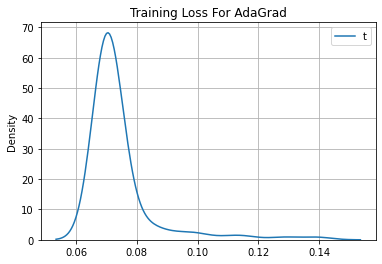

In [38]:
loss_range=np.log(adagrad_cnn_history.losses)
sns.distplot(adagrad_cnn_history.losses, hist=False)
plt.title('Training Loss For AdaGrad')
plt.grid()
plt.legend('top')
val_preds = adagrad_cnn_model.predict(X_test)
val_preds = target_scaler.inverse_transform(val_preds)
val_preds = np.exp(val_preds)+1

# mean_absolute_error, mean_squared_log_error.
y_true = np.array(dtest.mrp.values)
y_pred = val_preds[:,0]
v_rmsle = rmsle(y_true, y_pred)
v_rmse = mean_squared_error(y_true, y_pred , squared=False)
print(" RMSLE error for CNN Based Model on Test Data: "+str(v_rmsle))
print(" RMSE error for CNN Based Model on Test Data: "+str(v_rmse))
plt.show()

### Comparison between optimizers

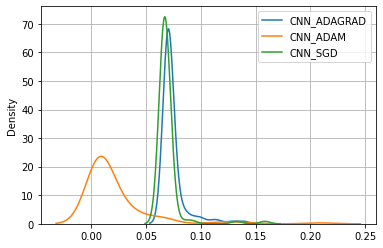

In [39]:
f, ax = plt.subplots(1, 1)
sns.distplot(adagrad_cnn_history.losses, hist=False, ax=ax)
sns.distplot(adam_cnn_history.losses, hist=False, ax=ax)
sns.distplot(sgd_cnn_history.losses, hist=False, ax=ax)
plt.legend(['CNN_ADAGRAD','CNN_ADAM','CNN_SGD'])
plt.grid()

# Predicting the Price using the best performant model

In [40]:
# Predict the price.
preds = adam_cnn_model.predict(X_test, batch_size=BATCH_SIZE)
preds = target_scaler.inverse_transform(preds)
preds = np.exp(preds)-1
dtest["predicted_price"] = preds
dtest.head()

1/1 [==============================] - 0s 77ms/step


,product_name,brand_name,product_category,description,product_category_wide,mrp,price,%discount,clean_description,seq_description,target,predicted_price
4217,Push Up Bra by Bluebella,us topshop,Lingerie,"pink push up bra by bluebella. 89% polyamide,1...",bras,52.0,35.0,32.69,pink push bra bluebella 89 polyamide 11 ela...,"[362, 193, 11, 904, 151, 85, 154, 9, 16, 4]",-0.095721,31.945011
1362,Aerie Seamless Thong,aerie,Everyday Loves Undies 7 for $27.50 USD,total cheek! smooth: no seams. all comfort. re...,panties,12.5,12.5,0.00,total cheek smooth no seams comfort real c...,"[64, 17, 53, 36, 263, 57, 8, 13, 3, 497, 532, ...",-0.706620,12.655202
4303,Retro Vikini 9K2124,hanky panky,Women - Lingerie & Shapewear - Panties,you can't go wrong with hanky panky's signatur...,panties,36.0,36.0,0.00,can t go wrong hanky panky s signature fit fe...,"[133, 52, 49, 371, 73, 75, 83, 108, 21, 129, 5...",-0.256251,36.420464
4594,Signature High-Waist Lace Betty Brief 482222,hanky panky,Women - Lingerie & Shapewear - Designer Lingerie,gorgeous allover lace and a cut that sits high...,panties,34.0,34.0,0.00,gorgeous allover lace cut sits higher waist gi...,"[252, 477, 2, 200, 1803, 396, 132, 484, 232, 7...",-0.281074,34.538105
4749,Signature Lace Vikini,hanky panky,Women's Panties,double up on the flattering fit of a v-front b...,panties,60.0,60.0,0.00,double flattering fit v front bikini soft sign...,"[510, 219, 21, 68, 27, 141, 14, 108, 32, 2, 40...",-0.032923,40.390495
